<a href="https://colab.research.google.com/github/ZhaoJiaxin107/Face_Recognition/blob/master/Facial_Expression_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning Project Facial Expression Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os 
os.chdir('/content/drive/My Drive/Colab Notebooks/facial_keypoints')
!ls

Facial_Augument.ipynb			fig_detection.jpg
Facial_Detection_Augmentation.h5	fig_detection.png
facial_detection_cv.ipynb		fig.jpg
Facial_Expression_Classification.ipynb	haarcascade_frontalface_alt.xml
facial_expression.h5			test.csv
fer2013.csv				training.csv


**Data Preparation**

It is noteworthy that in original provided dataset (either in training dataset or in public test dataset), we have actually in total 7 categories, apart from "Angry, Surprise, Fear, Happy, Sad and Neutral" that has been presented in our slides, we had an additional tag of "Disgust". 

However, the main problem will be that we have a quite unbalanced distribution of Disgust label in provided data, it accounts for a unusually low percentage, the obvious unbalance in data distribution will influence further neural network training, therefore we re-classify all pictures with "Disgust" label into "Angry" label. Such re-classification is relatively subjective, completely based on our perception of those two labels.

In [3]:
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import random
import sys
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [4]:
pip install brewer2mpl

Palettable (formerly brewer2mpl) is a library of color palettes for Python. It's written in pure Python with no dependencies, but it can supply color maps for matplotlib. You can use Palettable to customize matplotlib plots or supply colors for a web application.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import brewer2mpl

In [0]:
def emotion_count(y_train,classes):
  """
   The function re-classify picture with disgust label into angry label
  """
  print('Disgust classified as Angry')
  y_train.loc[y_train == 1] == 0
  classes.remove('Disgust')
  
  emo_classcount = {}
  #print(enumerate(classes))
  for new_num,_class in enumerate(classes):
    y_train.loc[(y_train == emotion[_class])] = new_num
    class_count = sum(y_train == (new_num))
    emo_classcount[_class] = (new_num,class_count)
  return y_train.values,emo_classcount

In [0]:
def load_data(filepath = 'fer2013.csv',usage = 'Training',classes =['Angry','Happy'],sample_split=0.3):
  df = pd.read_csv(filepath)
  df = df[df.Usage == usage] #select category

  classes.append('Disgust')
  frames = []
  for _class in classes:
    class_df = df[df['emotion'] == emotion[_class]]
    frames.append(class_df)

  # Concatenate pandas objects along a particular axis with optional set logic along the other axes.
  data = pd.concat(frames,axis = 0)

  # A random sample is a sample that is chosen randomly. 
  # Random samples are used to avoid bias and other unwanted effects
  # random.sample(list,length)
  rows = random.sample(list(data.index),int(len(data)* sample_split))
  data = data.loc[rows]

  x = list(data["pixels"])
  X = []

  for i in range(len(x)):
    each_pixel = [int(num) for num in x[i].split()]
    X.append(each_pixel)

  X = np.array(X)

  # reshape into 48*48*1 and rescale
  X = X.reshape(X.shape[0],48,48,1)
  X = X.astype("float32")
  X = X/255

  y_train,new_dict = emotion_count(data.emotion,classes)

  #Converts a class vector (integers) to binary class matrix.
  y_train = to_categorical(y_train)
  return X,y_train

In [0]:
## All three datasets are well loaded accordingly
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}

emo = ['Angry', 'Fear', 'Happy','Sad', 'Surprise', 'Neutral']

In [9]:
X_test,y_test = load_data(classes = emo,usage = 'PrivateTest',sample_split=1.0)
X_train,y_train = load_data(classes = emo,usage = 'Training',sample_split=1.0)
X_val,y_val = load_data(classes = emo,usage = 'PublicTest',sample_split=1.0)

Disgust classified as Angry
Disgust classified as Angry
Disgust classified as Angry


In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28709, 48, 48, 1)
(28709, 6)
(3589, 48, 48, 1)
(3589, 6)
(3589, 48, 48, 1)
(3589, 6)


After successfully loading the training, validation and testing dataset, we know had an input with dimension 48481, one channel is used since we only have greyscale picture instead of colorful pictures stored in RGB format, for output, we had 6 labels. Fot training dataset, we had a sample size as large as 28709 while validation as well as test dataset own a sample size of 3589. Overall, we had a pretty large dataset.

In [0]:
def overview(start,end,X):
 """
  The function is used to plot first several pictures for overviewing input format
 """

 fig = plt.figure(figsize = (20,20))
 for i in range(start,end+1):
   input_img = X[i:(i+1),:,:,:]
   ax = fig.add_subplot(16,12,i+1) 
   ax.imshow(input_img[0,:,:,0],cmap = plt.cm.gray)
   plt.xticks(np.array([])) # Set how the x-axis scale behaves
   plt.yticks(np.array([])) # Set how the y-axis scale behaves
   plt.tight_layout()
 plt.show()

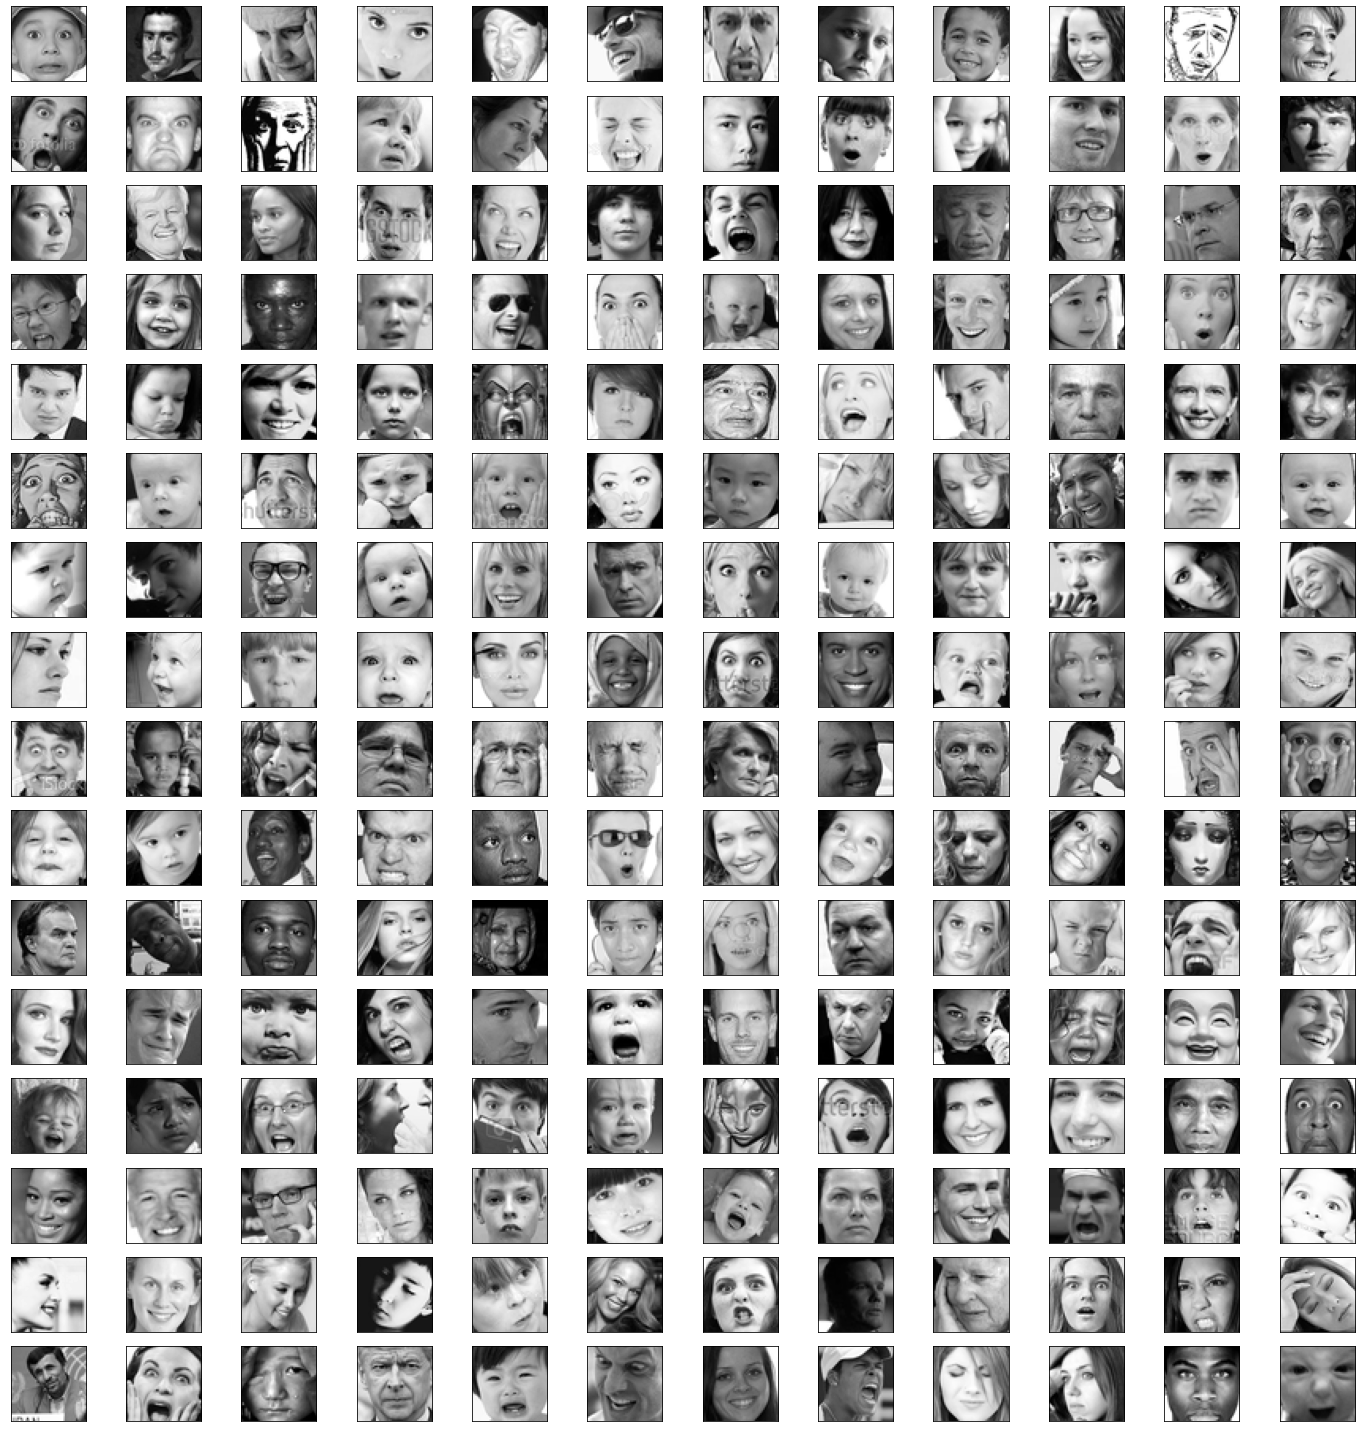

In [12]:
overview(0,191,X_train)

Show one single picture

(1, 48, 48, 1)


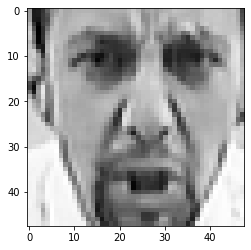

In [13]:
input_img = X_train[6:7,:,:,:] 
print(input_img.shape)
plt.imshow(input_img[0,:,:,0], cmap='gray')
plt.show()

In [0]:
y_train = y_train 
y_public = y_val 
y_private = y_test 
#np.argmax() 返回最大值索引号
y_train_labels  = [np.argmax(lst) for lst in y_train]
y_public_labels = [np.argmax(lst) for lst in y_public]
y_private_labels = [np.argmax(lst) for lst in y_private]

In [0]:
def plot_distribution(y1,y2,data_names,ylims =[1000,1000]): 
    """
    The function is used to plot the distribution of the labels of provided dataset 
    """
    colorset = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(np.arange(1,7), np.bincount(y1), color=colorset, alpha=0.8)
    ax1.set_xticks(np.arange(1.25,7.25,1))
    ax1.set_xticklabels(labels, rotation=60, fontsize=14)
    ax1.set_xlim([0,8])
    ax1.set_ylim([0,ylims[0]])
    ax1.set_title(data_names[0])
    
    ax2 = fig.add_subplot(1,2,2)
    ax2.bar(np.arange(1,7), np.bincount(y2), color=colorset, alpha=0.8)
    ax2.set_xticks(np.arange(1.25,7.24,1))
    ax2.set_xticklabels(labels, rotation=60, fontsize=14)
    ax2.set_xlim([0,8])
    ax2.set_ylim([0,ylims[1]])
    ax2.set_title(data_names[1])
    plt.tight_layout()
    plt.show()

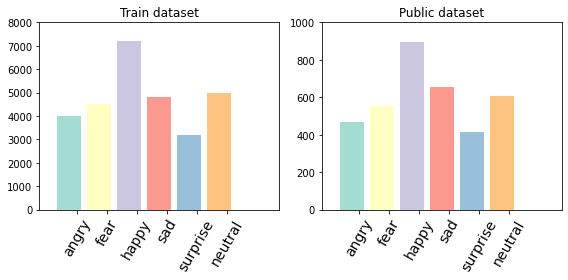

In [16]:
labels = ['angry', 'fear', 'happy', 'sad', 'surprise', 'neutral']
plot_distribution(y_train_labels, y_public_labels, ['Train dataset', 'Public dataset'], ylims =[8000,1000]) 

** Model Architeucture **

In [0]:
from keras import layers
from keras import models
from keras import optimizers

modelN = models.Sequential()
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(48, 48, 1)))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(6, activation='softmax'))

In [18]:
# optimizer:
modelN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print('Compiling')

Compiling


In [19]:
# Fit the model
history = modelN.fit(X_train,y_train,epochs=32,batch_size=128,validation_data=(X_val,y_val),shuffle=True,verbose = 1)

Train on 28709 samples, validate on 3589 samples
Epoch 1/32
28709/28709 [==============================] - 13s 462us/step - loss: 1.7621 - accuracy: 0.2502 - val_loss: 1.7649 - val_accuracy: 0.2494
Epoch 2/32
28709/28709 [==============================] - 11s 394us/step - loss: 1.7289 - accuracy: 0.2674 - val_loss: 1.6282 - val_accuracy: 0.3399
Epoch 3/32
28709/28709 [==============================] - 11s 393us/step - loss: 1.5210 - accuracy: 0.3883 - val_loss: 1.4532 - val_accuracy: 0.4327
Epoch 4/32
28709/28709 [==============================] - 11s 393us/step - loss: 1.3811 - accuracy: 0.4511 - val_loss: 1.3295 - val_accuracy: 0.4812
Epoch 5/32
28709/28709 [==============================] - 11s 396us/step - loss: 1.2752 - accuracy: 0.4946 - val_loss: 1.3138 - val_accuracy: 0.4753
Epoch 6/32
28709/28709 [==============================] - 11s 394us/step - loss: 1.1888 - accuracy: 0.5331 - val_loss: 1.2279 - val_accuracy: 0.5230
Epoch 7/32
28709/28709 [==============================] -

**Model Evaluaion**

In [0]:
modelN.save('facial_expression.h5')

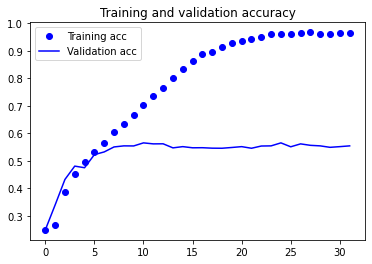

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

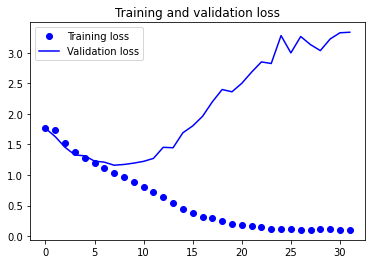

In [22]:
plt.figure()
plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Evaluate the model on training dataset**

In [23]:
score = modelN.evaluate(X_train,y_train,verbose = 1)
print("Model %s:%.2f%%" % (modelN.metrics_names[1],score[1]*100))

28709/28709 [==============================] - 5s 189us/step
Model accuracy:97.29%


**Prediction in true labels**

In [24]:
y_prob = modelN.predict(X_train,batch_size=32,verbose=1)

28709/28709 [==============================] - 5s 161us/step


In [0]:
# Returns the indices of the maximum values along an axis.
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_train]
#print("y_pred =",y_pred)
#print("y_true =",y_true)

In [0]:
import matplotlib
import matplotlib.pyplot as plt

In [0]:
def plot_subjects(start,end,y_pred,y_true,title = False):
  """
   The function is used to plot the picture subjects
  """

  fig = plt.figure(figsize=(12,12))
  emotion = {0:'Angry',1:'Fear',2:'Happy',3:'Sad',4:'Surprise',5:'Netural'}

  for i in range(start,end+1):
    input_img = X_train[i:i+1,:,:,:]
    ax = fig.add_subplot(6,6,i+1)
    ax.imshow(input_img[0,:,:,0],cmap=matplotlib.cm.gray)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

    if y_pred[i] != y_true[i]:
      plt.xlabel(emotion[y_true[i]],color="#53b3cb",fontsize=12)
    else:
      plt.xlabel(emotion[y_true[i]],fontsize=12)

    if title:
      plt.title(emotion[y_pred[i]],color='blue')
    
    plt.tight_layout()
  plt.show()

In [0]:
import brewer2mpl
def plot_probs(start,end, y_prob):
    """
    The function is used to plot the probability in histogram for six labels 
    """
    fig = plt.figure(figsize=(12,12))
    for i in range(start, end+1):
        input_img = X_train[i:(i+1),:,:,:]
        ax = fig.add_subplot(6,6,i+1)
        set3 = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
        ax.bar(np.arange(0,6), y_prob[i], color=set3,alpha=0.5)
        ax.set_xticks(np.arange(0.5,6.5,1))
        labels = ['angry', 'fear', 'happy', 'sad', 'surprise','neutral']
        ax.set_xticklabels(labels, rotation=90, fontsize=10)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()

In [0]:
def plot_subjects_with_probs(start,end,y_prob):
  """
   This plotting function is used to plot the probability together with its picture
  """
  iter = int((end - start)/6)

  for i in np.arange(0,iter):
    plot_subjects(i*6,(i+1)*6-1,y_pred,y_true,title=False)
    plot_probs(i*6,(i+1)*6-1,y_prob)

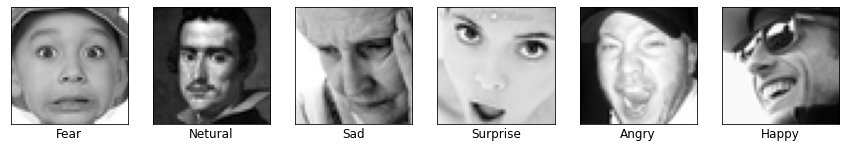

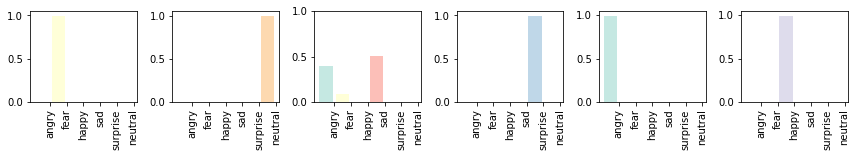

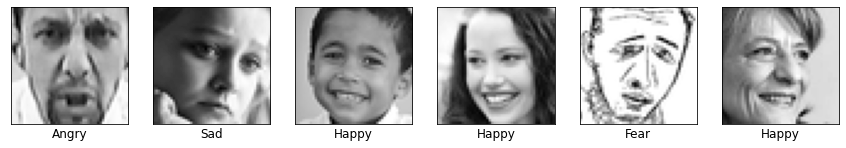

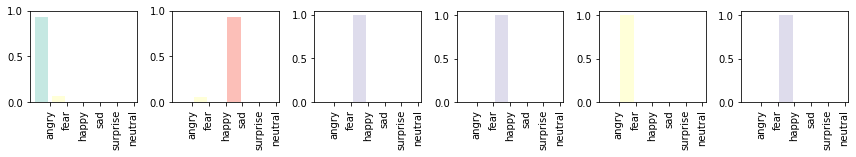

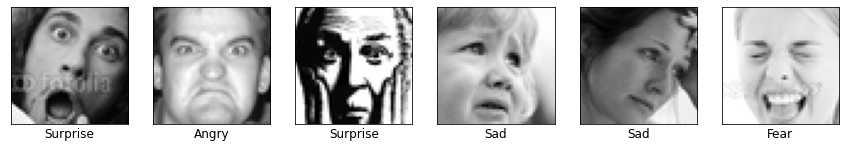

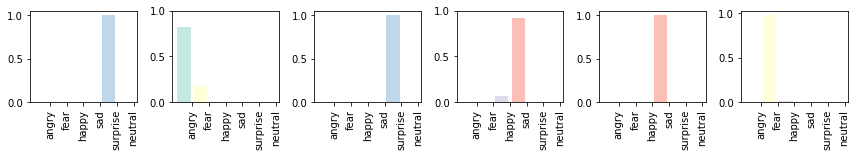

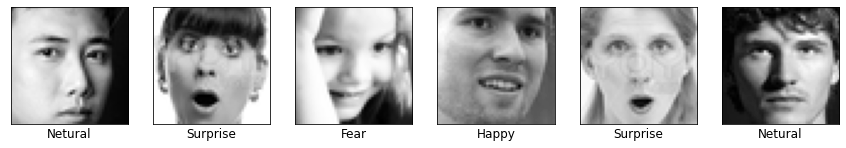

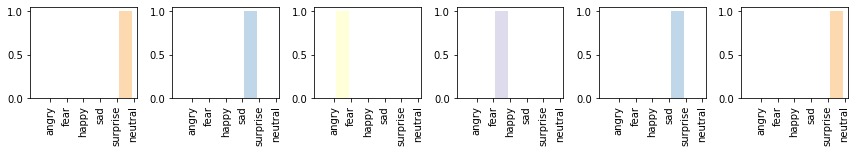

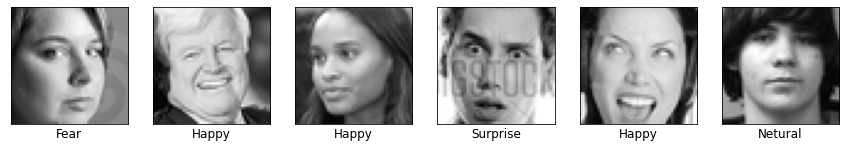

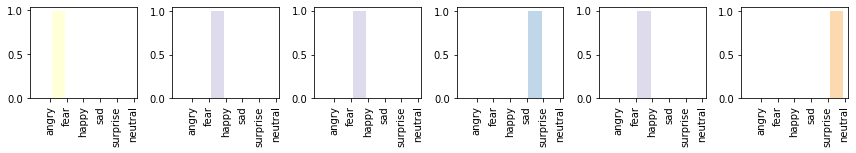

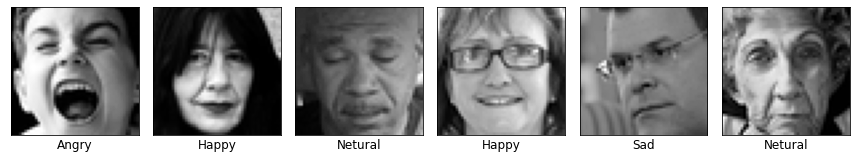

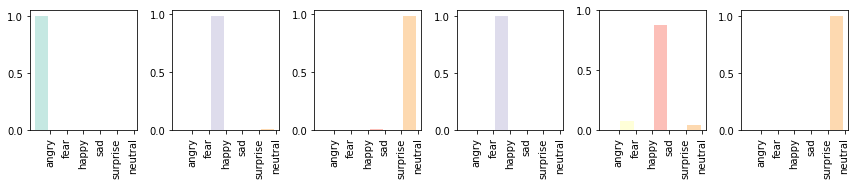

In [30]:
plot_subjects_with_probs(0, 36, y_prob)

In [0]:
def plot_distribution2(y_true,y_pred):
  """
    The function is used to compare the number of true labels as well as prediction results
  """
  colorset = brewer2mpl.get_map('Set3', 'qualitative', 6).mpl_colors
  ind = np.arange(1.5,7,1) # the x locations for groups
  width = 0.35
  fig,ax = plt.subplots()

  # https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.bar.html
  true = ax.bar(ind,np.bincount(y_true),width,color=colorset,alpha=1.0)
  pred = ax.bar(ind+width, np.bincount(y_pred),width,color=colorset,alpha = 0.3)

  ax.set_xticks(np.arange(1.5,7,1))
  ax.set_xticklabels(labels,rotation=30,fontsize=14)
  ax.set_xlim([1.25,7.5])
  #ax.set_ylim([0,5000])
  ax.set_title('True and Predicted Label Count in Training Dataset')
  plt.tight_layout()

  plt.show()

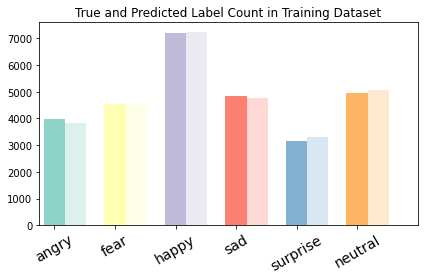

In [32]:
plot_distribution2(y_true,y_pred)

In [0]:
from sklearn.metrics import confusion_matrix

**Confusion Matrix:
What is Confusion Matrix and why you need it?**

Well, it is a performance measurement for machine learning classification problem where output can be two or more classes. 

It is a table with 4 different combinations of predicted and actual values.

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

In [0]:
def plot_confusion_matrix(y_true,y_pred,cmap=plt.cm.Blues):
  """
    The function is used to construct the confusion matrix
  """
  cm = confusion_matrix(y_true,y_pred)
  fig = plt.figure(figsize = (6,6))
  matplotlib.rcParams.update({'font.size':16})
  ax = fig.add_subplot(111)
  matrix = ax.imshow(cm,interpolation = 'nearest',cmap = cmap)
  fig.colorbar(matrix)

  for i in range(0,6):
    for j in range(0,6):
      ax.text(j,i,cm[i,j],va='center',ha='center')

  ticks = np.arange(len(labels))
  ax.set_xticks(ticks)
  ax.set_xticklabels(labels,rotation = 45)
  ax.set_yticks(ticks)
  ax.set_yticklabels(labels)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')


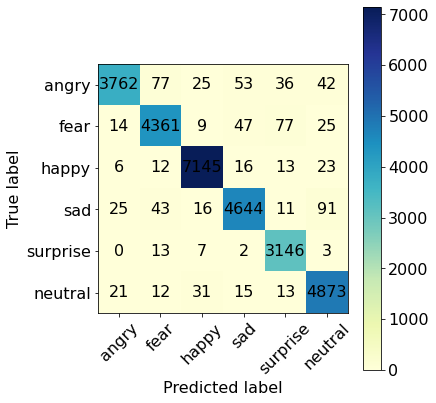

In [35]:
plot_confusion_matrix(y_true,y_pred,cmap=plt.cm.YlGnBu)
plt.show()